#DL-Lab-CSE6037_Lab-Assignment-4_Activity-1_Implementation_of_Transfer-Learning_on_the_AlexNet_Model_with_the_Dog-vs-Cat-dataset

#Submitted By: 20MAI0001 - NIHARIKA MAITRA

#git Repo Link :



https://github.com/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001__Niharika_Maitra_DL_Lab(CSE6037)_Implementation_of_Transfer_Learning_on_the_AlexNet_Model_with_the_Dog_vs_Cat_dataset_Activity_1_Asgn_4.ipynb



In [167]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model

#Developing / Creating a CovNet Model (on the pre trained/ built AlexNet Model) by implementing Transfer Learning Technique :

In [168]:
#Instantiation
model = Sequential()

In [169]:
img_input = layers.Input(shape=(150, 150, 3))

Retaining all the Convolution Layers (from 1st Convolution Layer to the 5th convolution Lyer) as it is in the AlexNet Model for Developing a CovNet Model (on the pre trained/ built AlexNet Model) by implementing Transfer Learning Technique :

In [170]:
#1st Convolutional Layer
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


In [171]:
#2nd Convolutional Layer
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

#3rd Convolutional Layer
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

#4th Convolutional Layer
x = layers.Conv2D(80, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

#5th Convolutional Layer
x = layers.Conv2D(96, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


#Implementing Transfer Learning by removing / deleting the Last/ 3rd Fully connected Layer from the the pre trained/ built AlexNet Model to Build / develop the CovNet Model on the pre trained/ built AlexNet Model

In [172]:
#Passing the CovNet to a Fully Connected layer
x = layers.Flatten()(x)


The CIFAR dataset with which the pre-built AlexNet Model was pre-trained is larger in size than the Dog-vs-Cat-dataset with which the new CovNet model developed by applying Transfer Learning on the pre-exixting AlexNet model

Therefore Transfer Learning is implemented on the pre-built AlexNet Model was pre-trained with the CIFAR dataset by removing / deleting the Last/ 3rd Fully connected Layer from the the pre trained/ built AlexNet Model to Build / develop the CovNet Model on the pre trained/ built AlexNet Model


In [173]:
# 1st Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)

#2nd Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)


In [174]:
#Output Layer
output = layers.Dense(1, activation='sigmoid')(x)

To create the Model: 

In [175]:
model1 = Model(img_input, output)

In [176]:
#Model Summary
model1.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 64)        0  

In [177]:
# Compiling the CovNet model
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [178]:
#save the trained model to a file so that it can be used to make predictions later :
model1.save("model1_model.h5")

To Display the first convolution function kernel filter coefficient values (for 15 images)

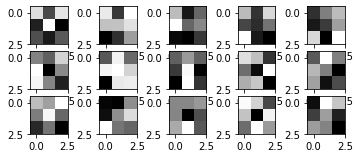

In [179]:
x1w = model1.get_weights()[0][:,:,0,:]

for i in range(1,16):

      plt.subplot(5,5,i)

      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

#To Load the Dog-vs-Cat-dataset :

In [180]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-04-16 14:46:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.208, 172.217.164.176, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   285MB/s    in 0.2s    

2021-04-16 14:46:32 (285 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [181]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [182]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

To view how the filenames look like in the cats and dogs train directories :

In [183]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.864.jpg', 'cat.200.jpg', 'cat.327.jpg', 'cat.382.jpg', 'cat.691.jpg', 'cat.657.jpg', 'cat.871.jpg', 'cat.308.jpg', 'cat.759.jpg', 'cat.679.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


#The new dataset Dog-vs-Cat-dataset used in this case to train the CovNet Model developed / built by applying Transfer Learning on the pre-built/developed AlexNet model that is pre-trained with the CIFAR dataset. 



To view the total number of cat and dog images in the train and validation directories :

In [184]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Data Preprocessing :

In [185]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


To Train the Dog-vs-Cat dataset on the CovNet Model :

In [186]:
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 9s - loss: 0.6947 - acc: 0.4990 - val_loss: 0.6900 - val_acc: 0.5340
Epoch 2/15
100/100 - 8s - loss: 0.6961 - acc: 0.5605 - val_loss: 0.6549 - val_acc: 0.6580
Epoch 3/15
100/100 - 8s - loss: 0.6652 - acc: 0.6155 - val_loss: 0.6430 - val_acc: 0.6370
Epoch 4/15
100/100 - 8s - loss: 0.6319 - acc: 0.6610 - val_loss: 0.6327 - val_acc: 0.6350
Epoch 5/15
100/100 - 8s - loss: 0.5925 - acc: 0.6905 - val_loss: 0.5869 - val_acc: 0.6860
Epoch 6/15
100/100 - 8s - loss: 0.5695 - acc: 0.7175 - val_loss: 0.5772 - val_acc: 0.6960
Epoch 7/15
100/100 - 8s - loss: 0.5410 - acc: 0.7295 - val_loss: 0.5959 - val_acc: 0.6920
Epoch 8/15
100/100 - 8s - loss: 0.4888 - acc: 0.7680 - val_loss: 0.5977 - val_acc: 0.6980
Epoch 9/15
100/100 - 8s - loss: 0.4540 - acc: 0.7945 - val_loss: 0.6708 - val_acc: 0.6540
Epoch 10/15
100/100 - 8s - loss: 0.4044 - acc: 0.8185 - val_loss: 0.6838 - val_acc: 0.6770
Epoch 11/15
100/100 - 8s - loss: 0.3301 - acc: 0.8515 - val_loss: 0.7665 - val_acc: 0.6740
Epoch 12

#The CIFAR dataset with which the pre-built AlexNet Model was pre-trained is larger in size than the Dog-vs-Cat-dataset with which the new CovNet model developed by applying Transfer Learning on the pre-exixting AlexNet model

In [187]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

To Display some Sample Images from the Dog-vs-Cat-dataset :

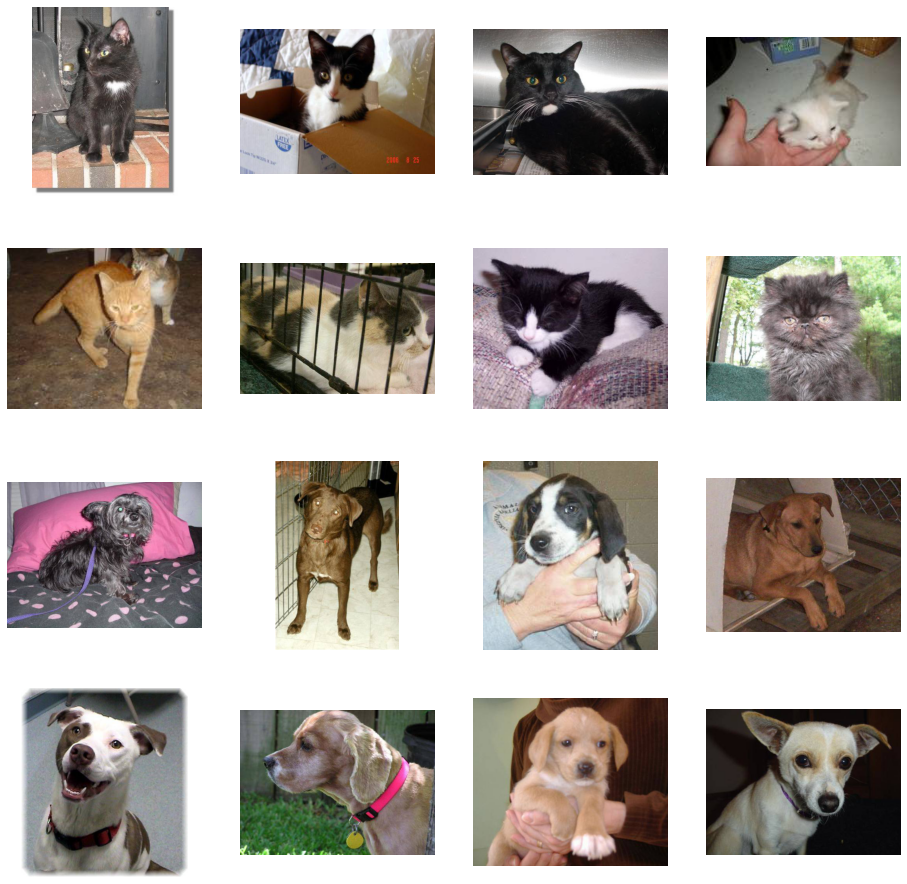

In [188]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Model takes image as input, and will output
intermediate representations for all layers in the  model built :

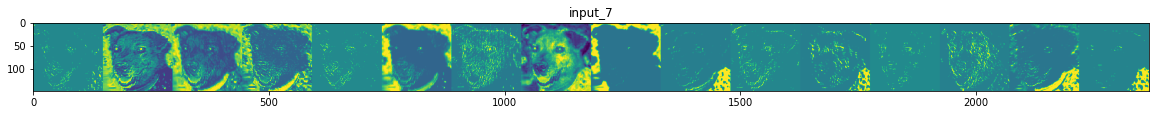

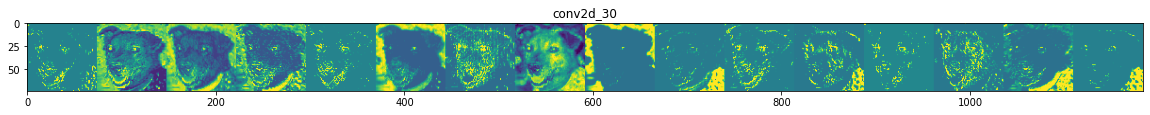

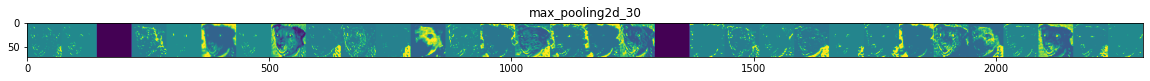

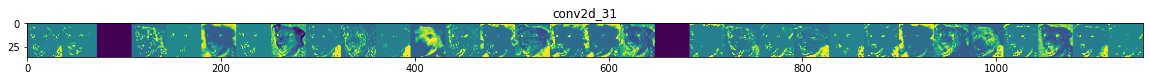

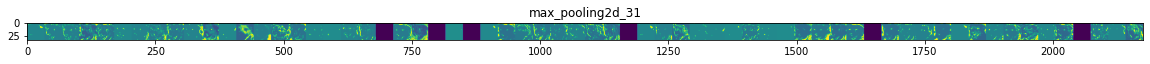

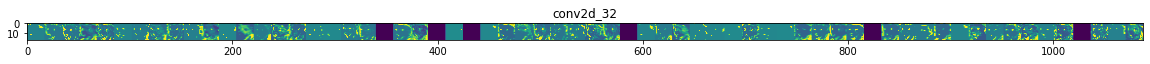

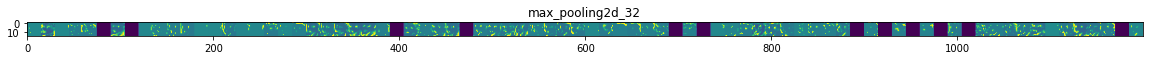

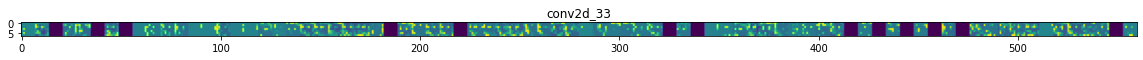

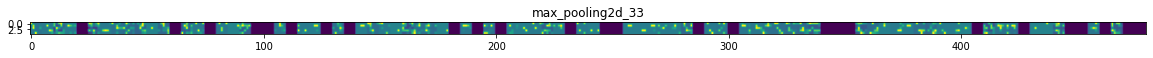

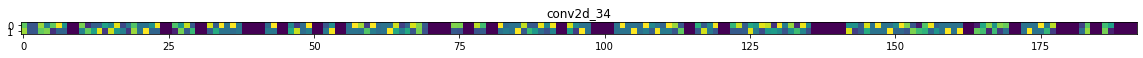

In [189]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model1.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

#  run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model1.layers]

#display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  # number of features in feature map
   
    size = feature_map.shape[1]
   
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
     
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

#CovNet Model Performance Analysis in terms of modelAccuracy, Loss/error:

In [190]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

Evaluating Accuracy for the implemented CovNet Model trained on the Dog-vs-Cat-dataset :

<Figure size 432x288 with 0 Axes>

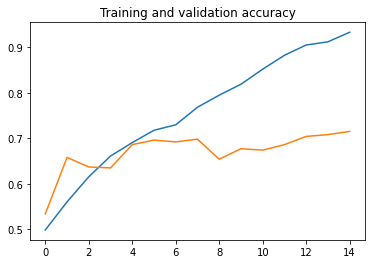

<Figure size 432x288 with 0 Axes>

In [191]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

Evaluating Loss for the implemented CovNet Model trained on the Dog-vs-Cat-dataset :


Text(0.5, 1.0, 'Training and validation loss')

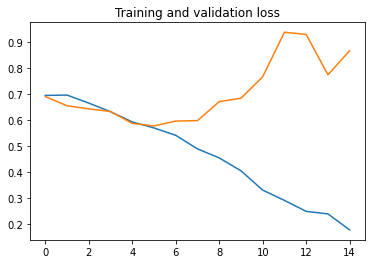

In [192]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [193]:
# Training accuracy
from sklearn.metrics import accuracy_score
acc_score = acc[14]
print('Training Accuracy  = ', acc_score)

Training Accuracy  =  0.9325000047683716


In [194]:
#Training Error/Loss
trn_loss = loss[14]
print('Training Error  = ', (trn_loss))

Training Error  =  0.17671309411525726
